Test loss: 0.017634857445955276


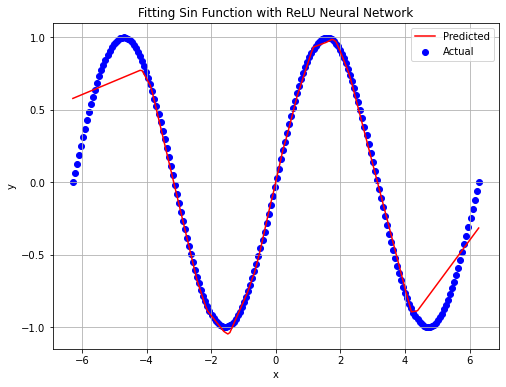

In [1]:
import numpy as np 
import tensorflow as tf  
import matplotlib.pyplot as plt 

# 生成训练集和测试集
np.random.seed(0)  # 设置随机种子，保证结果可重复
x_train = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(-1, 1)  # 生成1000个在[-2π, 2π]范围内的等间隔的x_train样本，reshape为列向量
y_train = np.sin(x_train) + np.random.normal(0, 0.1, size=x_train.shape)  # 计算对应的y_train，并加入正态分布的噪声

x_test = np.linspace(-2*np.pi, 2*np.pi, 200).reshape(-1, 1)  # 生成200个在[-2π, 2π]范围内的等间隔的x_test样本，reshape为列向量
y_test = np.sin(x_test)  # 计算对应的y_test，没有加入噪声

# 构建神经网络模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),  # 添加一个具有32个神经元的全连接隐藏层，并使用ReLU激活函数，指定输入形状为(1,)
    tf.keras.layers.Dense(32, activation='relu'),  # 添加第二个具有32个神经元的全连接隐藏层，并使用ReLU激活函数
    tf.keras.layers.Dense(1)  # 添加一个具有1个神经元的输出层，用于回归问题，没有使用激活函数
])

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')  # 使用Adam优化器，均方误差作为损失函数

# 训练模型
history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)  # 将训练集输入模型，训练100个epoch，每个batch大小为32，verbose设置为0表示静默训练

# 评估模型
loss = model.evaluate(x_test, y_test, verbose=0)  # 使用测试集评估模型性能，verbose设置为0表示静默模式
print("Test loss:", loss) 

# 使用模型进行预测
y_pred = model.predict(x_test)  # 使用训练好的模型进行预测

# 可视化结果
plt.figure(figsize=(8, 6)) 
plt.scatter(x_test, y_test, color='blue', label='Actual')  # 绘制测试集的真实值散点图
plt.plot(x_test, y_pred, color='red', label='Predicted')  # 绘制模型预测值曲线
plt.title('Fitting Sin Function with ReLU Neural Network') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.legend() 
plt.grid(True) 
plt.show() 
